<a href="https://colab.research.google.com/github/Omprakashnikam/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**OMPRAKASH NIKAM
##### **Team Member 2 -**KULDEEP RAJPUT
##### **Team Member 3 -**DEVENDRA SHEMALE
##### **Team Member 4 -**HITENDRA BHAMARE

# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data = pd.read_excel('/content/drive/MyDrive/data/Online Retail.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

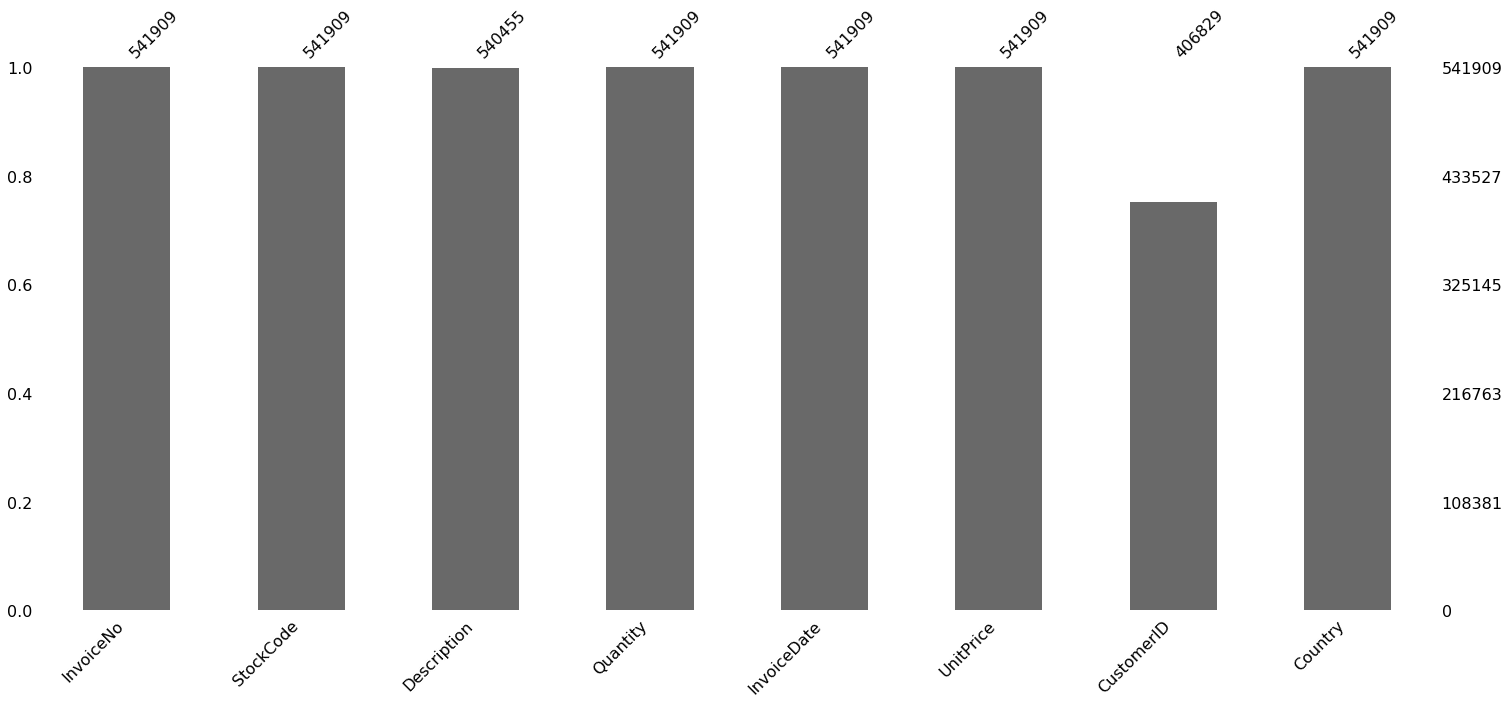

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5,5))
msno.bar(data)
plt.show()

### What did you know about your dataset?

In our ratail customer dataset has 541909 rows and 8 columns. It contains 5268 duplicate values and 1454 null values in description column and 135080 null values in customer id column. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

1. **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

2. **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3. **Description**: Product (item) name. Nominal.

4. **Quantity**: The quantities of each product (item) per transaction. Numeric.

5. **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

6. **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

7. **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8. **Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#1.InvoiceNo
print(data["InvoiceNo"].unique())
print(data["InvoiceNo"].nunique())

[536365 536366 536367 ... 581585 581586 581587]
25900


In [ ]:
#2.StockCode
print(data["StockCode"].unique())
print(data["StockCode"].nunique())

['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070


In [ ]:
#3.Description
print(data["Description"].unique())
print(data["Description"].nunique())

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223


In [ ]:
#4.Quantity
print(data["Quantity"].unique())
print(data["Quantity"].nunique())

[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     41    -72    -35    -21    -43    -19    -18
    -44    402    378    150    300     54    104     67    258     66
     4

In [ ]:
#6.UnitPrice
print(data["UnitPrice"].unique())
print(data["UnitPrice"].nunique())

[   2.55    3.39    2.75 ...  933.17 1714.17  224.69]
1630


In [ ]:
#7.CustomerID
print(data["CustomerID"].unique())
print(data["CustomerID"].nunique())

[17850. 13047. 12583. ... 13298. 14569. 12713.]
4372


In [ ]:
#8.Country
print(data["Country"].unique())
print(data["Country"].nunique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Check Duplicate values
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# Drop Duplicate values
data = data.drop_duplicates()

In [ ]:
#Check Missing Values.
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# Drop Null values
data = data.dropna(subset=['CustomerID'],axis=0)
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
data['Quantity'].min()

-80995

 We can see minimum value for quantity is negative in Quantity variable. and least value is -80995 

In [ ]:
# Check Cancalled orders in InvoiceNo.
cancelled_df= data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_df[cancelled_df['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
cancelled_df.shape

(8872, 8)

there are 8872 cancelled orders in our dataset.

In [ ]:
#Chack Unit price (max and min)
data['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
print(data['UnitPrice'].max())
print(data['UnitPrice'].min())

38970.0
0.0


In [ ]:
data[data['UnitPrice']==data['UnitPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


The order with max unitprice is a cancelled order("C" denoted cancelled order).

In [ ]:
# number of customers  and Total transactions. 
customers = len(data['CustomerID'].value_counts())
transactions = len(data['InvoiceNo'].value_counts())
print(f'total number of customers are {customers} and total transactions are {transactions}')

total number of customers are 4372 and total transactions are 22190


In [ ]:
c_count= data['CustomerID'].value_counts()
print(c_count)

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: CustomerID, Length: 4372, dtype: int64


 Customer id17841 CustomerID has most number of transactions 7812. This customer must be the wholesale customer of the store.

In [ ]:
# number of countrys
data['Country'].value_counts()


United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
tr_uk = round(len(data[data['Country']=='United Kingdom']) / len(data) * 100,2)
print(f"{tr_uk}% transactions are from United Kingdom.")

88.83% transactions are from United Kingdom.


In [ ]:
#customers per city.
co_city_df= data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
co_city_df= co_city_df.reset_index().rename(columns={'CustomerID':'Number_of_Customers'})
co_city_df.head()

,Country,Number_of_Customers
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25


In [ ]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [ ]:
# assigning date column
data['date'] = data['InvoiceDate'].apply(extract_date)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [ ]:
Qtywise_c_id_date= data.groupby(['CustomerID','date'])['Quantity'].sum().reset_index()
Qtywise_c_id_date.sort_values(by='Quantity', ascending=False).head()

,CustomerID,date,Quantity
16609,17450.0,2011-09-20,25930
7948,14646.0,2011-10-20,18140
181,12415.0,2011-06-15,15241
14210,16684.0,2011-10-05,14808
7937,14646.0,2011-08-11,14730


These are the customers who purchased maximum quantity per order.

In [ ]:
# Average quantity customers purchase per order
New_data= Qtywise_c_id_date[Qtywise_c_id_date['Quantity']<25930.0]
print(New_data.mean())

CustomerID    15236.181705
Quantity        252.237419
dtype: float64


The average quantity purchased by the customers per order is around 250.

In [ ]:
# average quantity
avg_qnty= New_data.groupby(['CustomerID'],as_index=False).agg({'Quantity':'mean'}).rename(columns={'Quantity':'qnty/order'})
orders_df= New_data['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID', 'CustomerID':'orders'}).sort_values(by='CustomerID')
avg_qnty= avg_qnty.merge(orders_df)
avg_qnty.head()

,CustomerID,qnty/order,orders
0,12346.0,0.000000,1
1,12347.0,351.142857,7
2,12348.0,585.250000,4
3,12349.0,631.000000,1
4,12350.0,197.000000,1


In [ ]:
avg_qnty['orders'].describe()

count    4372.000000
mean        4.413312
std         6.673380
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       146.000000
Name: orders, dtype: float64

In [ ]:
# filtering based on orders above 5 and Quantity greater than 0
filtered_avg_qnty = avg_qnty[(avg_qnty['orders']>=5) & (avg_qnty['qnty/order']>0)]
filtered_avg_qnty.head()

,CustomerID,qnty/order,orders
1,12347.0,351.142857,7
5,12352.0,67.142857,7
12,12359.0,266.500000,6
15,12362.0,170.153846,13
29,12380.0,225.200000,5


In [ ]:
print("% of data with Price = 0: ", round(len(data[data.UnitPrice == 0]) * 100 / len(data),2),"%" )
print("Count of unique Customer ID values ", data[data.UnitPrice == 0].CustomerID.nunique(), "\n")
data[data.UnitPrice == 0][~data.CustomerID.isnull()].head()

% of data with Price = 0:  0.01 %
Count of unique Customer ID values  31 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,2010-12-05
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,2010-12-16
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,2010-12-21
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011-01-06
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011-01-06


In [ ]:
# Dropping Cases with UnitPrice = 0
data_filtered = data[data.UnitPrice >0]
data_filtered["UnitPrice"].describe()

count    401564.000000
mean          3.474410
std          69.767501
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

Not only maximum transactions come from the UK but also most customers are located in the United Kingdom.

#Data Filtering

In [ ]:
# filtering only United Kingdom customers data
ukretail_df= data[data['Country'] == 'United Kingdom']

In [ ]:
# We saw before there were cancelled orders present in the dataset.So, filtering cancelled orders also.
# filtering cancelled orders
ukretail_df= ukretail_df[ukretail_df['Quantity']>0]

In [ ]:
# total cost
ukretail_df['total_cost'] = ukretail_df["Quantity"] * ukretail_df["UnitPrice"]

In [ ]:
# checking dates
print(f"first date: {ukretail_df['date'].min()}")
print(f"latest date: {ukretail_df['date'].max()}")

first date: 2010-12-01
latest date: 2011-12-09


##RFM Analysis

**Recency**

To calculate recency, We will fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we will calculate the days difference between the most recent transaction carried out by the customer and this reference date.

In [ ]:
# setting reference date as 2011-12-10
ref_date= dt.date(2011,12,10)

In [ ]:
# checking recent purchase date
recency_df = ukretail_df.groupby("CustomerID")['date'].max().reset_index()
recency_df = recency_df.rename(columns={'date':'recent_purchase'})
recency_df.head()


,CustomerID,recent_purchase
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


we can see this are the last date of purchase of the customers

In [ ]:
# calculate recency
recency_df['Recency'] = recency_df['recent_purchase'].apply(lambda x: (ref_date - x).days)

In [ ]:
recency_df.head()

,CustomerID,recent_purchase,Recency
0,12346.0,2011-01-18,326
1,12747.0,2011-12-07,3
2,12748.0,2011-12-09,1
3,12749.0,2011-12-06,4
4,12820.0,2011-12-06,4


In [ ]:
# Descriptive Statistics of Recency
recency_df.describe()

,CustomerID,Recency
count,3921.000000,3921.000000
mean,15561.471563,92.722265
std,1576.823683,99.528532
min,12346.000000,1.000000
25%,14208.000000,18.000000
50%,15569.000000,51.000000
75%,16913.000000,143.000000
max,18287.000000,374.000000


**Frequency**

Frequency will helps us to know how many times a customer has purchased.

In [ ]:
frequency_df = ukretail_df.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59


In [ ]:
# Descriptive Statistics of frequency
frequency_df.describe()

,CustomerID,Frequency
count,3921.000000,3921.000000
mean,15561.471563,89.065800
std,1576.823683,214.022733
min,12346.000000,1.000000
25%,14208.000000,17.000000
50%,15569.000000,40.000000
75%,16913.000000,98.000000
max,18287.000000,7676.000000


**Monetary**


In [ ]:
monetary_df = ukretail_df.groupby('CustomerID').agg({'total_cost': 'sum'}).reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace= True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
# Descriptive Statistics of monetary
monetary_df.describe()

,CustomerID,Monetary
count,3921.000000,3921.000000
mean,15561.471563,1857.950687
std,1576.823683,7477.736186
min,12346.000000,0.000000
25%,14208.000000,298.110000
50%,15569.000000,644.300000
75%,16913.000000,1570.810000
max,18287.000000,259657.300000


#Combining Recency, Frequency and Monetary.

In [ ]:
# combining Recency, Frequency and Monetary
rfm_df= recency_df.merge(frequency_df, how="outer")
rfm_df= rfm_df.merge(monetary_df, how="outer")
rfm_df.drop("recent_purchase", axis=1, inplace=True)
rfm_df.set_index("CustomerID", inplace=True)

In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,92.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,298.110000
50%,51.000000,40.000000,644.300000
75%,143.000000,98.000000,1570.810000
max,374.000000,7676.000000,259657.300000


We can see the minimum monetary value is 0 and it do not make sense to us so will remove the rows with 0 monetary value

In [ ]:
rfm_df= rfm_df[rfm_df['Monetary'] > 0]

We will assign the score from 1 to 4 on the basis of recency, frequency and monetary based on there quartiles.

4 being the best score and 1 being the worst score. A final score will be calculated simply by combining individual RFM scores.

In [ ]:
# Calculate quartiles
quartiles= rfm_df.quantile(q=[0.25,0.5,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,18.0,17.0,298.185
0.50,51.0,40.0,644.975
0.75,143.0,98.0,1571.285


Higher recency is bad so it will get the lesser score but in case of frequency and monetary higher values are good so they will get higher scores.

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
#Calculating R, F and M segment value and adding into existing dataset
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quartiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quartiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quartiles,))

In [ ]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12747.0,3,103,4196.01,4,4,4
12748.0,1,4413,33053.19,4,4,4
12749.0,4,199,4090.88,4,4,4
12820.0,4,59,942.34,4,3,3


We can see best recency i.e customer with most recently purchase has R=4 score 

and same is with Frequency and Monetary

In [ ]:

# Concatenating RFM to create singal RMF score
rfm_df['RFM_Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

#Calculating RFMScore 
rfm_df['RFM_score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12747.0,3,103,4196.01,4,4,4,444,12
12748.0,1,4413,33053.19,4,4,4,444,12
12749.0,4,199,4090.88,4,4,4,444,12
12820.0,4,59,942.34,4,3,3,433,10


The RFM Score of 12 will show us the best customers of the retail store.

In [ ]:
#Lets see the best customer (RMF=12)
rfm_df[rfm_df['RFM_score']==12]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score
CustomerID,,,,,,,,
12747.0,3,103,4196.01,4,4,4,444,12
12748.0,1,4413,33053.19,4,4,4,444,12
12749.0,4,199,4090.88,4,4,4,444,12
12839.0,3,314,5591.42,4,4,4,444,12
12841.0,5,414,3991.58,4,4,4,444,12
...,...,...,...,...,...,...,...,...
18229.0,12,164,7276.90,4,4,4,444,12
18241.0,10,104,2073.09,4,4,4,444,12
18245.0,8,175,2567.06,4,4,4,444,12


There are 407 customers who had purchased recently, most frequently and also spend most.

In [ ]:
#Analyzing RFM score distribution and segmenting them manually as High value, average value and Low value customers.
def create_segments(df):
    if df['RFM_score'] >= 9:
        return 'High'
    elif (df['RFM_score'] >= 5) and (df['RFM_score'] < 9):
        return 'Average'
    else:
        return 'Low'

In [ ]:
rfm_df['Segment'] = rfm_df.apply(create_segments, axis=1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average
12747.0,3,103,4196.01,4,4,4,444,12,High
12748.0,1,4413,33053.19,4,4,4,444,12,High
12749.0,4,199,4090.88,4,4,4,444,12,High
12820.0,4,59,942.34,4,3,3,433,10,High


### What all manipulations have you done and insights you found?

1.total number of customers are 4372 and total transactions are 22190.

2.We Drop all Duplicate values of datset.

3.We drop all null values in description column and customer id column. 

4.There are 8872 cancelled orders in our dataset.

5.Their is 88.83% transactions are from United Kingdom only hence for anlysis we only used United Kingdom customers data

6. We done the RFM Analysis on data (Recency, Frequency and Monetary) and we segmented the customers into three clusters as High, Average and Low value customers based on the RFM score.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

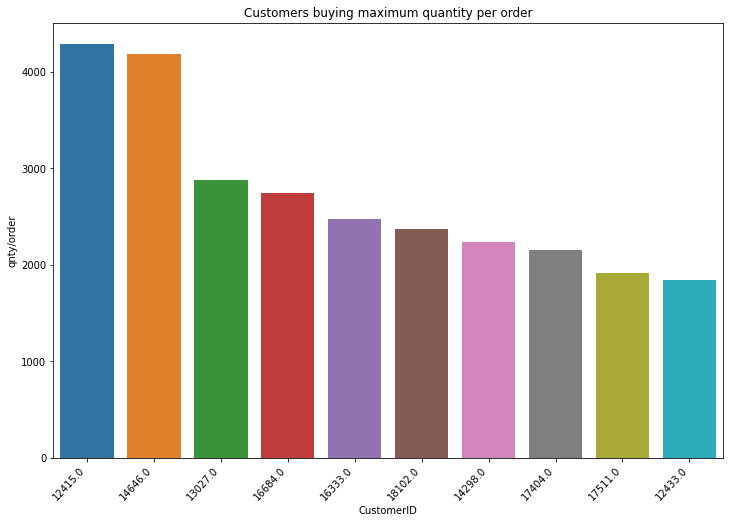

In [ ]:
# Chart - 1 visualization code
# Customers buying maximum quantity on average per order
data1= filtered_avg_qnty.sort_values(by='qnty/order',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='qnty/order', data= data1, order=data1['CustomerID'])
ax.set_title('Customers buying maximum quantity per order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()


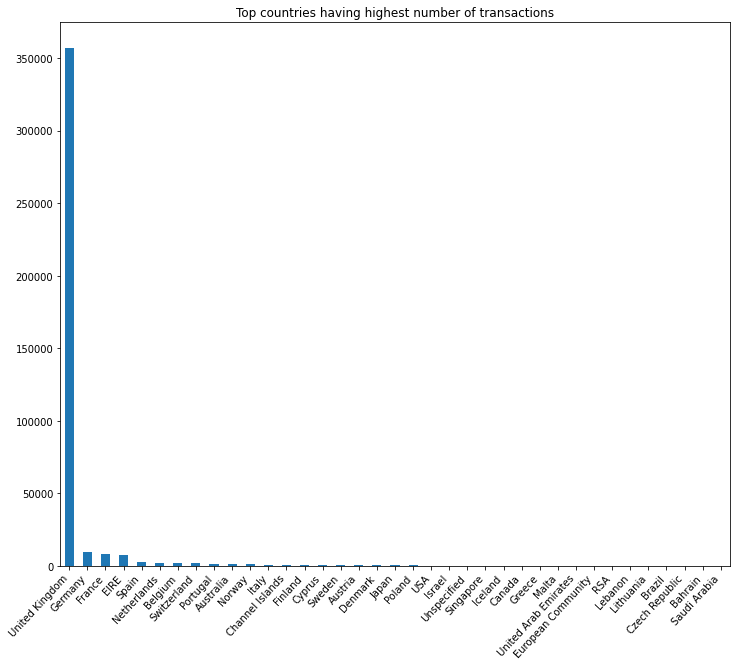

In [ ]:
# Chart - 1 visualization code
country_count = data['Country'].value_counts()
plt.figure(figsize=(12,10))
country_count.plot.bar()
plt.title('Top countries having highest number of transactions');
plt.xticks(rotation=47, ha="right")
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Most retailer customer are coming from United kingdom, Germany, France, EIRE, Spain respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if we focus on country which has highest number of customer we can able to generate more revenue.

#### Chart - 2

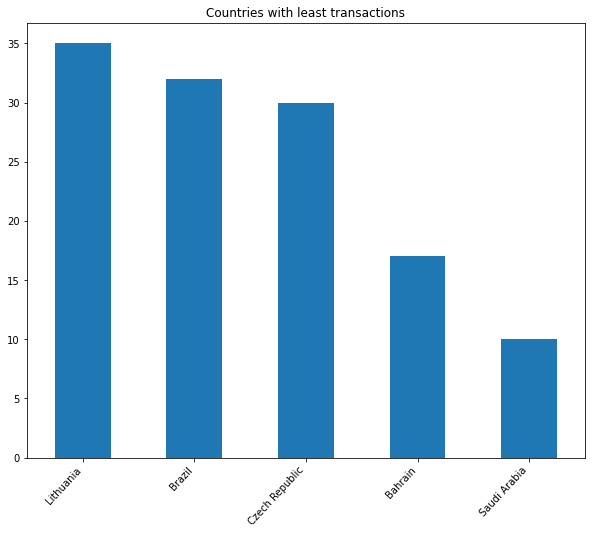

In [ ]:
# Chart - 2 visualization code
# countries with least transactions
plt.figure(figsize=(10,8))
country_count.tail().plot.bar()
plt.title('Countries with least transactions')
plt.xticks(rotation=47, ha="right")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

The country with least number of customer are Lithuania, Brazil, Czech Rapublic, Bahrain, Saudi Arabia respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

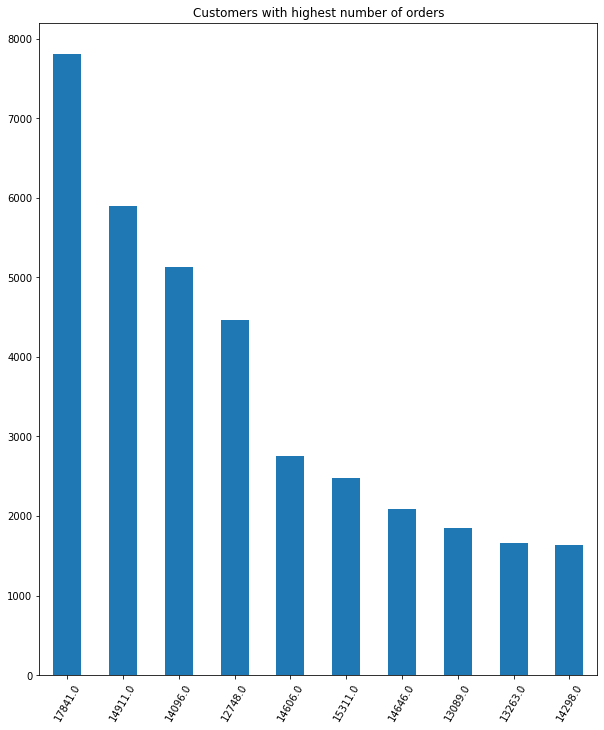

In [ ]:
# Chart - 3 visualization code
# top customers 
plt.figure(figsize=(10,12))
c_count.head(10).plot.bar()
plt.title('Customers with highest number of orders')
plt.xticks(rotation=60)

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

The customer with highest of order and customer id are 17841.0, 14911.0, 14096.0, 12748.0, 14606.0 respectively. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Figure size 1080x864 with 0 Axes>

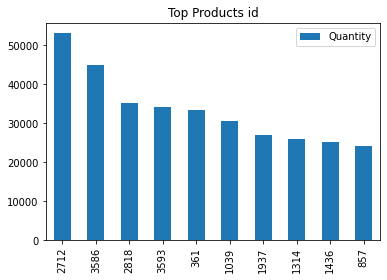

Top 10 Product are ['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PACK OF 72 RETROSPOT CAKE CASES', 'POPCORN HOLDER', 'RABBIT NIGHT LIGHT', 'MINI PAINT SET VINTAGE ', 'PACK OF 12 LONDON TISSUES ', 'PACK OF 60 PINK PAISLEY CAKE CASES']


In [ ]:
# Chart - 4 visualization code
product_count = data.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', \
                                                                                                      ascending=False)

plt.figure(figsize=(15,12))
product_count.head(10).plot.bar()
plt.title('Top Products id')
plt.xticks(rotation=90)
plt.show()
print(f'Top 10 Product are {list(product_count.Description.head(10))}')

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

The most demanding product are WORLD WAR 2 GLIDERS ASSTD DESIGNS, JUMBO BAG RED RETROSPOT, ASSORTED COLOUR BIRD ORNAMENT, WHITE HANGING HEART T-LIGHT HOLDER, PACK OF 72 RETROSPOT CAKE CASES respectively. 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

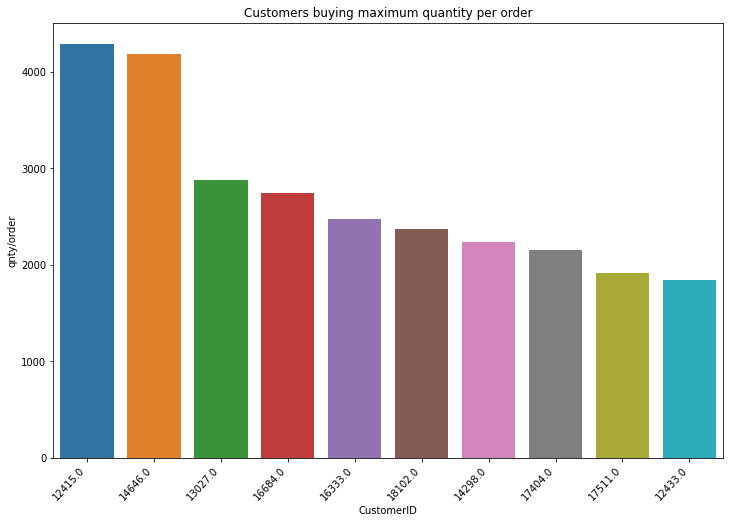

In [ ]:
# Chart - 5 visualization code
# Customers buying maximum quantity on average per order
data1= filtered_avg_qnty.sort_values(by='qnty/order',ascending=False).head(10)

# plot
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='qnty/order', data= data1, order=data1['CustomerID'])
ax.set_title('Customers buying maximum quantity per order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

The top 5 Customers buying maximum quantity per order are 12415,14646,13027,16684,16333. they all are Wholesalers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

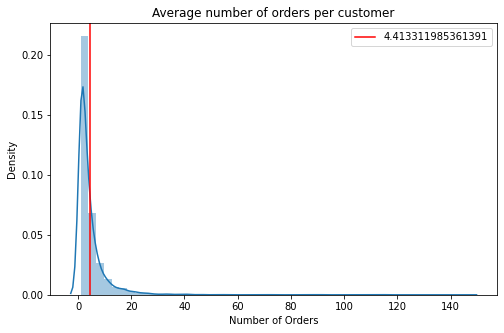

In [ ]:
# Chart - 6 visualization code
# Average number of orders per customer
plt.figure(figsize=(8,5))
sns.distplot(avg_qnty['orders'])
plt.xlabel("Number of Orders")
xmean=avg_qnty['orders'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average number of orders per customer");

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution

##### 2. What is/are the insight(s) found from the chart?

Customers have placed orders 4 or 5 times on average and maximum number of orders being 146 from a single customer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

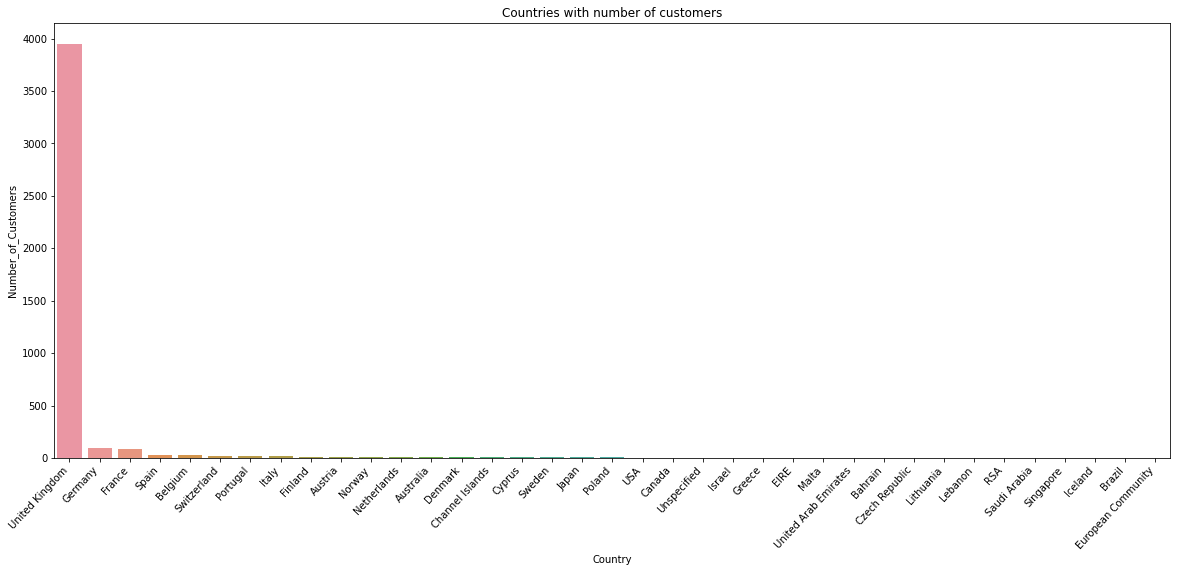

In [ ]:
# Chart - 7 visualization code
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.barplot(x='Country', y='Number_of_Customers',data=co_city_df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
ax.set_title('Countries with number of customers')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers are from united kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

Text(0.5, 1.0, 'Distribution of Recency')

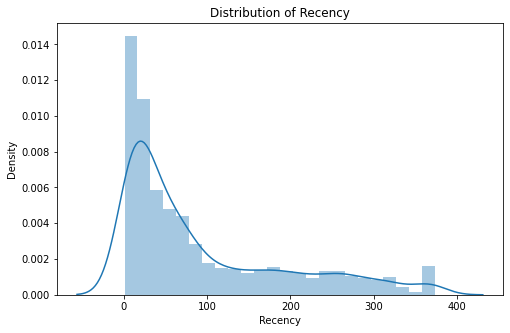

In [ ]:
# Chart - 8 visualization code
# Distribution of Recency
plt.figure(figsize=(8,5))
sns.distplot(recency_df['Recency'])
plt.title("Distribution of Recency")

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution

##### 2. What is/are the insight(s) found from the chart?

We can see that there are more customers who have purchased recently and the graph decrease furthur.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 1.0, 'Distribution of Frequncy')

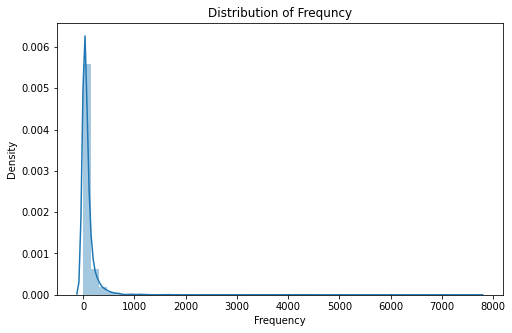

In [ ]:
# Chart - 9 visualization code
# Distribution of Frequncy
plt.figure(figsize=(8,5))
sns.distplot(frequency_df['Frequency'])
plt.title("Distribution of Frequncy")

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution of frequency is skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 1.0, 'Distribution of Monetary')

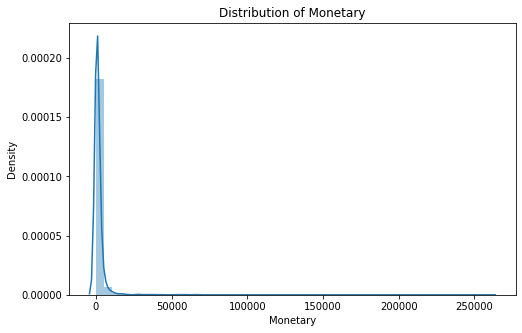

In [ ]:
# Chart - 10 visualization code
# Distribution of Monetary
plt.figure(figsize=(8,5))
sns.distplot(monetary_df['Monetary'])
plt.title("Distribution of Monetary")

##### 1. Why did you pick the specific chart?

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution of Monetary value is also skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

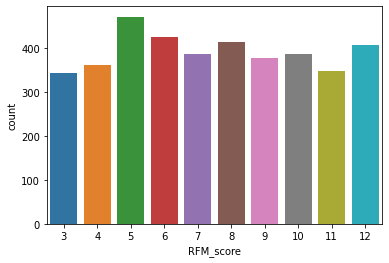

In [ ]:
# Chart - 11 visualization code
sns.countplot(rfm_df["RFM_score"])

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Most of customers havr RMF score of 5

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

Text(0.5, 1.0, 'Customer Segmentation based on RFM Analysis')

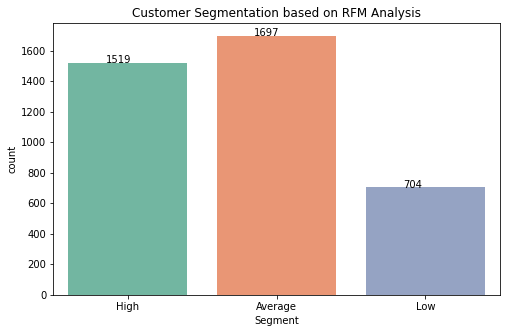

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,5))
ax = sns.countplot(x=rfm_df["Segment"], palette = "Set2",
                   order=['High','Average','Low'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Customer Segmentation based on RFM Analysis")

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

 From this RFM analysis we segmented the customers into three clusters as High, Average and Low value customers based on the RFM score.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
rfm_data = rfm_df[["Recency", "Frequency", "Monetary"]]
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,4,59,942.34


In [ ]:
# Transform Your data
#log transformation
new_df = np.log(rfm_data)
new_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12747.0,1.098612,4.634729,8.341889
12748.0,0.000000,8.392310,10.405873
12749.0,1.386294,5.293305,8.316515
12820.0,1.386294,4.077537,6.848366


 As we require normally distributed data to perform K-means clustering we will apply log transformation to reduce skewness.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalizing data
norm_data = scaler.fit_transform(new_df)

##### Which method have you used to scale you data and why?


**Standardization** is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. 

we used this method to scaled data between 0 and 1 for better result. 

## ***7. ML Model Implementation***

### **K-means Clustering**

In [ ]:
# ML Model - 1 Implementation (K-means Clustering)
# Load the data
X =norm_data

# Define the number of clusters
k = 3

# Define the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.predict(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the results
print("Cluster labels: ", labels)
print("Cluster centers: ", cluster_centers)

Cluster labels:  [1 2 2 ... 0 2 1]
Cluster centers:  [[ 0.73969194 -0.95680358 -0.90487352]
 [-0.01767826  0.23566107  0.14603331]
 [-1.21436008  1.14647782  1.23746903]]


In [ ]:
# assigning K-means clusters
# assigning clusters
rfm_df['Cluster']=labels
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average,1
12747.0,3,103,4196.01,4,4,4,444,12,High,2
12748.0,1,4413,33053.19,4,4,4,444,12,High,2
12749.0,4,199,4090.88,4,4,4,444,12,High,2
12820.0,4,59,942.34,4,3,3,433,10,High,2


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

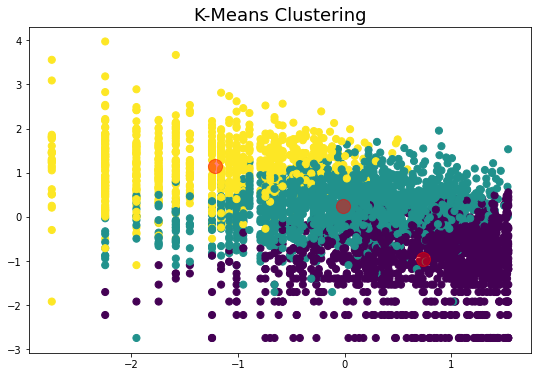

In [ ]:
# visualizing clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1], c=labels, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.title('K-Means Clustering', fontsize=18)
plt.show()

We use k = 3  for above model but in plot classification is not much clear. 

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Evaluation using Silhoutte method
silhouette = []
for n_clusters in range(2,11):
    clusterer = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)

#Fit the algorithem.
    preds = clusterer.fit_predict(norm_data)
    score = silhouette_score(norm_data, preds)
    silhouette.append(score)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", score)


For n_clusters = 2 The average silhouette_score is : 0.3959673538474021
For n_clusters = 3 The average silhouette_score is : 0.30390449065874375
For n_clusters = 4 The average silhouette_score is : 0.3016740559449831
For n_clusters = 5 The average silhouette_score is : 0.2807620393507498
For n_clusters = 6 The average silhouette_score is : 0.27501097405238956
For n_clusters = 7 The average silhouette_score is : 0.2641359415940221
For n_clusters = 8 The average silhouette_score is : 0.2604225970399054
For n_clusters = 9 The average silhouette_score is : 0.2655860757949798
For n_clusters = 10 The average silhouette_score is : 0.2632746380761234


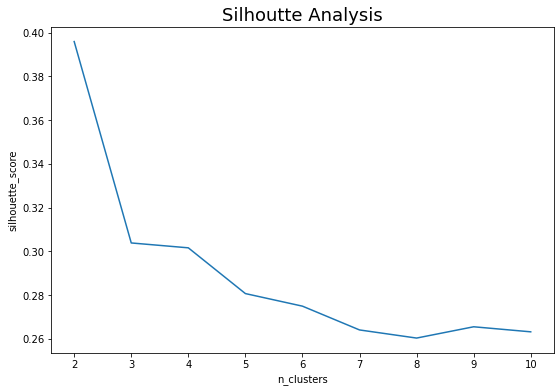

In [ ]:
# plotting Silhoutte scores
plt.figure(figsize=(9,6))
n_clusters = [x for x in range(2,11)]
df_silhouette = pd.DataFrame({'n_clusters':n_clusters,'silhouette_score':silhouette})
sns.lineplot(data=df_silhouette, x="n_clusters", y="silhouette_score")
plt.title('Silhoutte Analysis', fontsize=18)
plt.show()

In [ ]:
# Define the number of clusters
k = 2
# Define the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels_cv = kmeans.predict(X)

# Get the cluster centers
cluster_centers_cv = kmeans.cluster_centers_

# Print the results
print("Cluster labels: ", labels_cv)
print("Cluster centers: ", cluster_centers_cv)

Cluster labels:  [0 1 1 ... 0 1 1]
Cluster centers:  [[ 0.55553095 -0.63787774 -0.64224765]
 [-0.69961679  0.80332154  0.80882484]]


In [ ]:
# assigning K-means clusters
rfm_df['Cluster']=labels_cv
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average,0
12747.0,3,103,4196.01,4,4,4,444,12,High,1
12748.0,1,4413,33053.19,4,4,4,444,12,High,1
12749.0,4,199,4090.88,4,4,4,444,12,High,1
12820.0,4,59,942.34,4,3,3,433,10,High,1


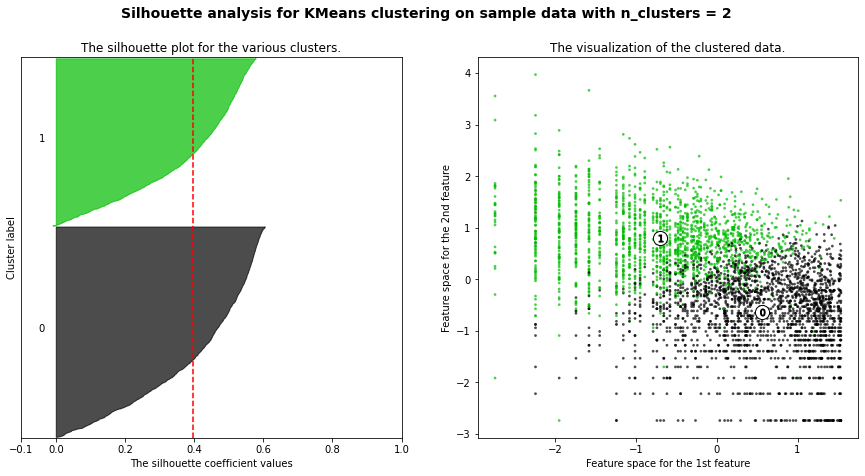

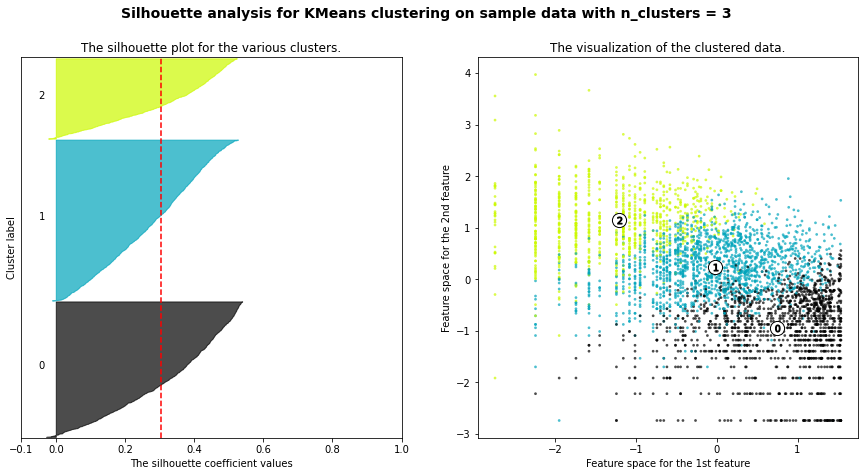

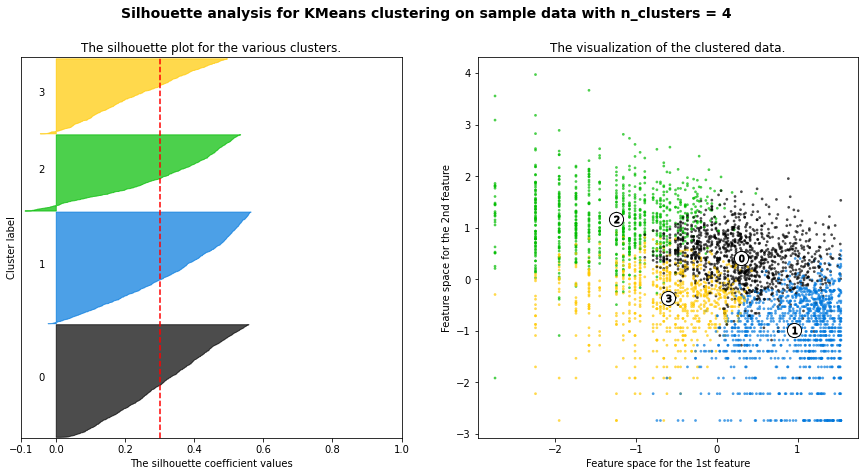

In [ ]:
# plot silhoutte score
X = norm_data
range_n_clusters = [2,3,4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The best silhouette score obtained is when the number of clusters is 2. and from above plot no negative value when you used number of clusters 2.

##### Which hyperparameter optimization technique have you used and why?

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes,first we use number of cluster is 3 but classification of cluster is not clear but after cross validation we got number of cluster=2 and classification is clear.

###**Hierarchical Clustering**

In [ ]:
# Fitting hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(norm_data)

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:

# assigning hierarchical clusters
rfm_df['HR_labels']=cluster.labels_
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment,Cluster,HR_labels
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average,0,0
12747.0,3,103,4196.01,4,4,4,444,12,High,1,1
12748.0,1,4413,33053.19,4,4,4,444,12,High,1,1
12749.0,4,199,4090.88,4,4,4,444,12,High,1,1
12820.0,4,59,942.34,4,3,3,433,10,High,1,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

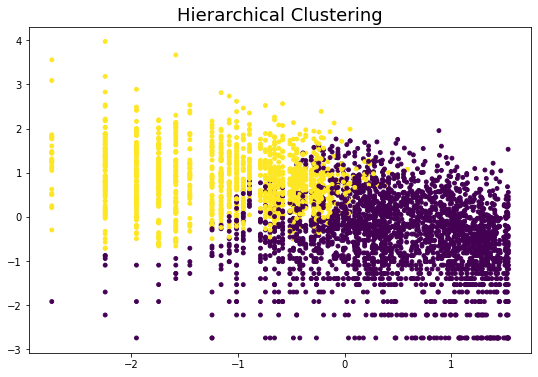

In [ ]:
# Visualizing evaluation Metric Score chart
# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1],c=rfm_df['HR_labels'],s=15)

plt.title('Hierarchical Clustering', fontsize=18)
plt.show()

We can see that ,Customers are well separate when we use Hierarchical clustering and number of clusters equal to 2

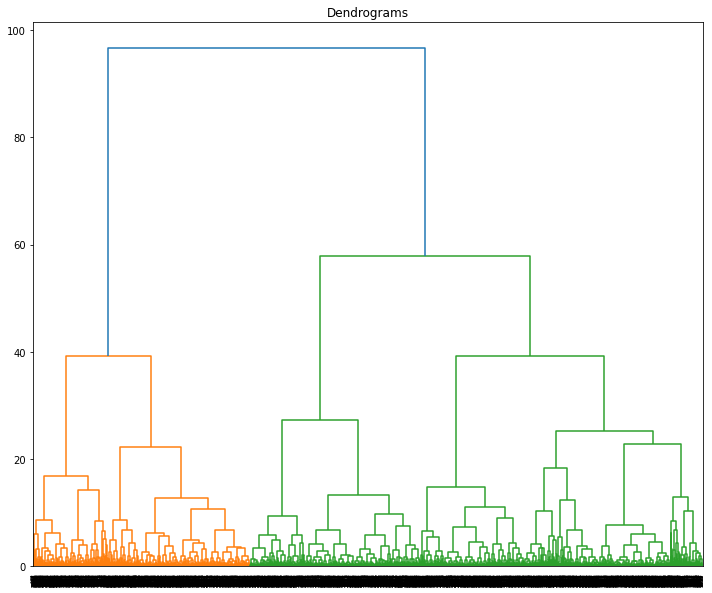

In [ ]:
# dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,10))
dend = shc.dendrogram(shc.linkage(norm_data, method='ward'))
plt.title("Dendrograms")  
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 70.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Load the data
from sklearn.model_selection import RandomizedSearchCV
X = norm_data

# Define the linkage criterion
linkage_criterion = 'ward'

# Define the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(linkage=linkage_criterion)

# Define the parameter grid
param_grid = {'n_clusters': np.arange(2, 11)}
# Fit the Algorithm
random_search = RandomizedSearchCV(agg_clustering, param_grid, cv=5, n_iter=10 ,scoring = silhouette_score )
random_search.fit(X)


RandomizedSearchCV(cv=5, estimator=AgglomerativeClustering(),
                   param_distributions={'n_clusters': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   scoring=<function silhouette_score at 0x7fc879b2fb80>)

In [ ]:
# number of cluster after cross validation
random_search.best_params_

{'n_clusters': 2}

In [ ]:
# Predict on the model
cluster_cv = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_cv.fit_predict(norm_data)

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# assigning hierarchical clusters
rfm_df['HR_cluster_labels_cv']=cluster_cv.labels_
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment,Cluster,HR_labels,HR_cluster_labels_cv
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average,0,0,0
12747.0,3,103,4196.01,4,4,4,444,12,High,1,1,1
12748.0,1,4413,33053.19,4,4,4,444,12,High,1,1,1
12749.0,4,199,4090.88,4,4,4,444,12,High,1,1,1
12820.0,4,59,942.34,4,3,3,433,10,High,1,1,1


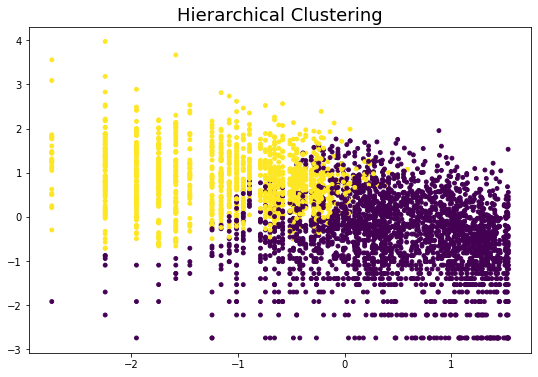

In [ ]:
# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1],c=rfm_df['HR_cluster_labels_cv'],s=15)

plt.title('Hierarchical Clustering', fontsize=18)
plt.show()

##### Which hyperparameter optimization technique have you used and why?


Randomized search is used to find optimal combination of hyper parameters for creating the best model. Randomized search is a model tuning technique

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, same number of cluster after cross validation.

### **density-based spatial clustering of applications with noise (DBSCAN)**


In [ ]:
# ML Model - 3 Implementation(DBSCAN)
from sklearn.cluster import DBSCAN
import numpy as np

# Load the data
X = norm_data

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit the model to the data
dbscan.fit(X)

# Get the cluster labels
labels = dbscan.labels_

# Print the number of clusters
print("Number of clusters: ", len(np.unique(labels)))

# Print the cluster labels
print("Cluster labels: ", labels)

Number of clusters:  4
Cluster labels:  [-1 -1 -1 ... -1 -1  0]


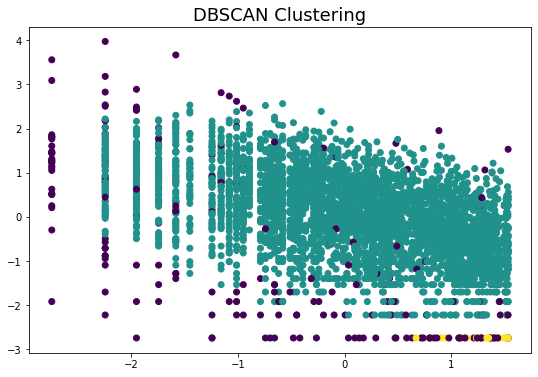

In [ ]:
# ML Model - 3 Implementation(DBSCAN)

# Fit the Algorithm
dbscan = DBSCAN(eps=0.5, min_samples=15)
y_pred = dbscan.fit_predict(norm_data)
# Predict on the model
# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1],c=y_pred)
plt.title('DBSCAN Clustering',fontsize=18)
plt.show()

There is noise in the model. Therefore, we need to find the value of epsilon and then train our model again

In [ ]:
# finding optimum value of epsilon
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(norm_data)
distances, indices = nbrs.kneighbors(norm_data)

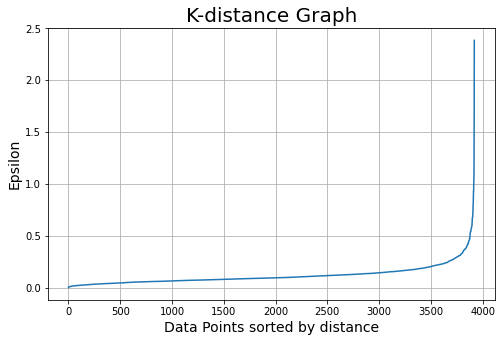

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.4 in this case.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.4,min_samples=15)
dbscan_opt.fit(X)

DBSCAN(eps=0.4, min_samples=15)

In [ ]:
rfm_df['DBSCAN_opt_labels']=dbscan_opt.labels_
rfm_df['DBSCAN_opt_labels'].value_counts()

 0    3503
-1     395
 1      22
Name: DBSCAN_opt_labels, dtype: int64

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Load the data
X = norm_data

# Define the DBSCAN model
dbscan = DBSCAN()

# Define the parameter grid
param_grid = {'eps': [0.1, 0.3, 0.5], 'min_samples': [5, 10, 15]}

# Use the silhouette score as the evaluation metric
metric = silhouette_score

# Perform 5-fold cross-validation
grid_search = GridSearchCV(dbscan, param_grid, cv=5, scoring=metric)
grid_search.fit(X)

# Print the best parameters.
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'eps': 0.1, 'min_samples': 5}


In [ ]:
#fit the model
dbscan_opt=DBSCAN(eps=0.1,min_samples=5)
dbscan_opt.fit(X)

DBSCAN(eps=0.1)

In [ ]:
#Check the lebal
rfm_df['DBSCAN_opt_labels']=dbscan_opt.labels_
rfm_df['DBSCAN_opt_labels'].value_counts()

-1     3148
 2      125
 0       52
 1       44
 28      31
       ... 
 58       5
 9        5
 65       5
 57       4
 56       4
Name: DBSCAN_opt_labels, Length: 68, dtype: int64

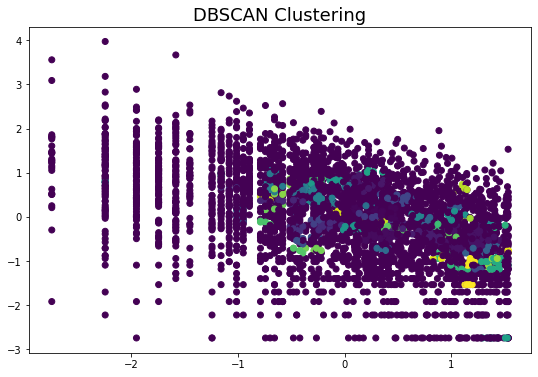

In [ ]:
#pridict on data 
y_pred_opt=dbscan_opt.fit_predict(norm_data)

# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1],c=y_pred_opt)
plt.title('DBSCAN Clustering',fontsize=18)
plt.show()

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0 and 1 are the two different clusters, and -1 is the noise.



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

#**Result**


In [ ]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment,Cluster,HR_labels,HR_cluster_labels_cv,DBSCAN_opt_labels
CustomerID,,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average,0,0,0,-1
12747.0,3,103,4196.01,4,4,4,444,12,High,1,1,1,-1
12748.0,1,4413,33053.19,4,4,4,444,12,High,1,1,1,-1
12749.0,4,199,4090.88,4,4,4,444,12,High,1,1,1,-1
12820.0,4,59,942.34,4,3,3,433,10,High,1,1,1,-1


In [ ]:
# Calculate average RFM values and size for each Segment
segment_summary = rfm_df.groupby(['Segment']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

segment_summary

,Recency,Frequency,Monetary
Segment,,,
Average,100.0,35.0,694.0
High,27.0,186.0,3931.0
Low,217.0,11.0,194.0


From RFM analysis, we manually created three segment on quartile basis as High, averarge and low value customers.

In [ ]:
# Calculate average RFM values and size for each cluster
cluster_summary = rfm_df.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,142.0,24.0,452.0
1,31.0,170.0,3628.0


After performing K-means clustering and finding optimal value of clusters as k=2 using elbow method and silhoutte score we assigned the clusters to our RFM data.


We can observe following clusters of customers:

**Wholesalers** - 'Cluster 1' is the high value customer segment as the customers in this group has least mean recency with high mean frequency. They are also the ones who have high mean monetary value.

**Average Customers** - It is quite evident that 'Cluster 0' has customers who  rarely shop i.e mean recency is 142 days and when they order, their orders are pretty low valued.

Apart from the numbers, the visualization of clusters in Silhouette Analysis show that both customer segments are quite distinct with very little overlap between them.

In [ ]:
# Calculate average RFM values and size for each HR_labels
HR_labels_summary = rfm_df.groupby(['HR_labels']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

HR_labels_summary

,Recency,Frequency,Monetary
HR_labels,,,
0,130.0,41.0,833.0
1,16.0,189.0,3993.0


The dendrogram also depicted the number of clusters as 2. We saw in Hierarchical clustering the customers were well grouped using 2 clusters. Looking at the above summary we can observe the same as K-means clustering. Here, mean renency for both clusters have decreased whereas mean frequency and monetary have increased as compared to K-means clustering.

**Wholesale Customers** - 'Cluster 1' is the high value customer segment as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently. These are the wholesale customers of the retail store.

**Average Customers** - 'Cluster 0' is the average customer segment. These customers order less frequent than the wholesale customers and their orders are pretty low valued.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 **Hierarchical Clustering**

Because ,The dendrogram also depicted the number of clusters as 2. We saw in Hierarchical clustering the customers were well grouped using 2 clusters.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?


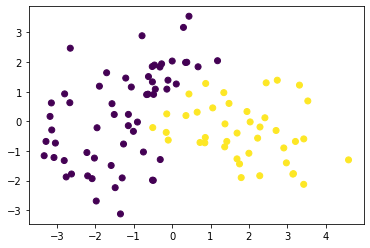

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Generate sample data
norm_data, _ = make_blobs(n_samples=100, centers=3, random_state=0)

# Fit the AgglomerativeClustering model
model = AgglomerativeClustering(n_clusters=2)
model.fit(norm_data)

# Transform the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(norm_data)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis')
plt.show()

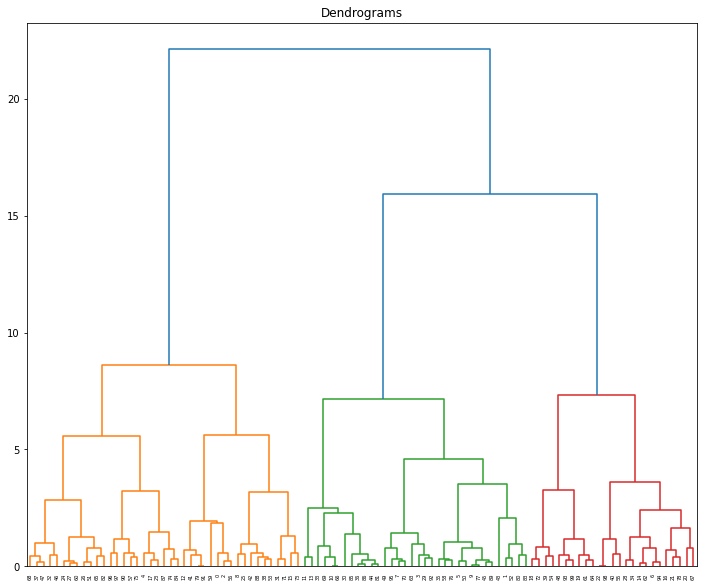

In [ ]:
 #dendrogram for model explinablity
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,10))
dend = shc.dendrogram(shc.linkage(norm_data, method='ward'))
plt.title("Dendrograms")  
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 70.

From Dendograme we can see Their is Two cluster Wholesale Customers and average customers.

# **Conclusion**

1.From RFM analysis, we manually creaed three clusters on a quartile basis as 
high, average and low value customers.

2.Most of the customers are from united kingdom and The most demanding 5 product are WORLD WAR 2 GLIDERS ASSTD DESIGNS, JUMBO BAG RED RETROSPOT, ASSORTED COLOUR BIRD ORNAMENT, WHITE HANGING HEART T-LIGHT HOLDER, PACK OF 72 RETROSPOT CAKE CASES respectively.


3.In K-means clustering, using the elbow method we got the optimal value of clusters as 2. Also, the best silhouette score obtained is when the number of clusters is 2.

4.In Hierarchical clustering, the dendrogram also depicted the number of clusters as 2. We saw in Hierarchical clustering the customers were well grouped using 2 clusters.

5.DBSCAN gave us four clusters 0 and 1 the two different clusters, and -1 and -2 as the noise which was more.
There are two customer clusters that have been formed as Wholesale customers and average customers.

6.From above ml model the customers are segmented into 2 groups as follow :-

**Wholesale Customers** - The high value customer segment as the customers in this group place the highest value orders with a very high relative frequency and also transacted most recently.

**Average Customers** - The average customer segment. These customers order less frequent than the wholesale customers and their orders are pretty low valued and also rarely shop.

7.We can conclude that K-means clustering and Hierarchical clustering can be used for this dataset to segment customers based on RFM analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***